In [3]:
# pip install numpy pandas sklearn

In [4]:
    import numpy as np
    import pandas as pd
    import itertools
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import PassiveAggressiveClassifier
    from sklearn.metrics import accuracy_score, confusion_matrix
    import matplotlib.pyplot as plt

In [5]:
    #Read the data
    df=pd.read_csv('news.csv')
    #Get shape and head
    df.shape
    df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
df=df.set_index("Unnamed: 0")

In [7]:
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
df.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [9]:
# Checking if the data set contains any null values
df[df.isnull().any(axis=1)].count()

title    0
text     0
label    0
dtype: int64

In [10]:
    # Geting the labels
    labels=df.label
    labels.head()

Unnamed: 0
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object

In [11]:
    #Spliting the dataset
    x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

#  initializing a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded) And fit the model.

In [12]:
    # Initializing a TfidfVectorizer
    tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
    # Fit and transform train set, transform test set
    tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
    tfidf_test=tfidf_vectorizer.transform(x_test)

# intializing a PassiveAggressiveClassifier, predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics.

In [13]:
    # Initializing a PassiveAggressiveClassifier
    pac=PassiveAggressiveClassifier(max_iter=50)
    pac.fit(tfidf_train,y_train)
    # Predicting on the test set and calculate accuracy
    y_pred=pac.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    print(f'Accuracy: {round(score*100,2)}%')

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Accuracy: 92.82%


# confusion matrix to gain insight into the number of false and true negatives and positives. It shows that we have 591 true positives, 586 true negatives, 43 false positives, and 47 false negatives.

In [14]:
    # Building confusion matrix
    confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[588,  50],
       [ 41, 588]], dtype=int64)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(x_train)
count_test = count_vectorizer.transform(x_test)

In [16]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [17]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [19]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [20]:
print(count_df.equals(tfidf_df))

False


In [21]:
#comparing models
count_df.head()

,00,000,0000,000000031,00000031,000035,00006,0001,0001pt,0002,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
tfidf_df.head()

,00,000,0000,000000031,00000031,000035,00006,0001,0001pt,0002,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.026870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.085687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.014948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Testing Linear Models

In [23]:
#Testing linear model
linear_clf = PassiveAggressiveClassifier(n_iter=50)

# to check whether the confusion matrix is normalized or not

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.932
Confusion matrix, without normalization


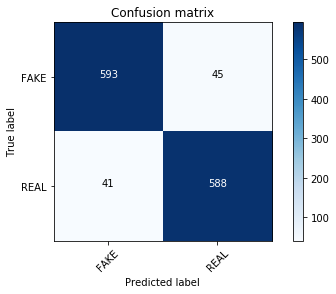

In [25]:
# confusion matrics for linear model
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Using best performing classifier with dataset (tfidf_vectorizer) and Passive Aggressive classifier (linear_clf), inspect the top 30 vectors for fake and real news.

# Introspecting models and using multinomialNB

In [26]:
#Introspecting models
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -5.740100992655639 2016
FAKE -5.071320990882844 october
FAKE -3.5213202752794395 share
FAKE -3.4511461119347264 november
FAKE -3.2218931022501924 hillary
FAKE -3.1783516478459006 election
FAKE -3.0669280485814445 article
FAKE -2.698875666445753 establishment
FAKE -2.679221285050845 snip
FAKE -2.631966134365997 advertisement
FAKE -2.454124999549415 print
FAKE -2.3904858076339828 mosul
FAKE -2.221931731428653 source
FAKE -2.1087004682610906 podesta
FAKE -2.033204554453123 fbi
FAKE -2.0272836013762943 oct
FAKE -1.9042555067005895 26
FAKE -1.8314257622578707 wikileaks
FAKE -1.821286059937474 28
FAKE -1.8090511365687623 just
FAKE -1.8015708304727132 uk
FAKE -1.78304247670629 ayotte
FAKE -1.7803025699483945 corporate
FAKE -1.7770726533815635 daesh
FAKE -1.732517203362932 email
FAKE -1.7114950594643994 com
FAKE -1.69603256780154 dr
FAKE -1.6643901515367645 demand
FAKE -1.657471482362486 russia
FAKE -1.6520723405156248 obamacare

REAL 4.657273166854012 said
REAL 3.12231494641657 says
REAL

# Features of the most real and most fake news.

In [27]:
feature_names = tfidf_vectorizer.get_feature_names()

In [28]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

accuracy:   0.841
Confusion matrix, without normalization


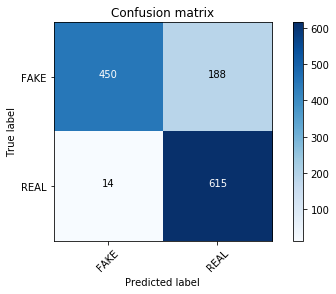

In [29]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [30]:
### Most real
Most_real=sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

In [31]:
Most_real

[(-6.22197530470591, 'trump'),
 (-6.497605805346871, 'said'),
 (-6.662531647877456, 'clinton'),
 (-7.065781869598758, 'obama'),
 (-7.207972756158055, 'sanders'),
 (-7.234925782550284, 'campaign'),
 (-7.237003111086504, 'president'),
 (-7.296593811053582, 'cruz'),
 (-7.299197619519782, 'republican'),
 (-7.313393428647016, 'state'),
 (-7.376070618026606, 'party'),
 (-7.446157097593646, 'new'),
 (-7.466916525204573, 'people'),
 (-7.536327320592957, 'percent'),
 (-7.576615375894985, 'house'),
 (-7.576982067110062, 'bush'),
 (-7.600976150807376, 'republicans'),
 (-7.642637838589939, 'voters'),
 (-7.657194719107827, 'rubio'),
 (-7.684400401187373, 'states')]

In [32]:
### Most fake
Most_fake=sorted(zip(clf.coef_[0], feature_names))[:20]

In [33]:
Most_fake

[(-11.433854969152721, '000035'),
 (-11.433854969152721, '0001'),
 (-11.433854969152721, '0001pt'),
 (-11.433854969152721, '0002'),
 (-11.433854969152721, '000billion'),
 (-11.433854969152721, '0011'),
 (-11.433854969152721, '004s'),
 (-11.433854969152721, '005'),
 (-11.433854969152721, '005s'),
 (-11.433854969152721, '00684'),
 (-11.433854969152721, '006s'),
 (-11.433854969152721, '007'),
 (-11.433854969152721, '007s'),
 (-11.433854969152721, '008s'),
 (-11.433854969152721, '0099'),
 (-11.433854969152721, '00am'),
 (-11.433854969152721, '00p'),
 (-11.433854969152721, '00pm'),
 (-11.433854969152721, '013c2812c9'),
 (-11.433854969152721, '014')]

# The heighest accuracy we got from linear model. 